# Preguntas del catálogo

### Instalaciones previas

In [ ]:
!pip install matplotlib
!pip install opencv-python
!pip install scikit-image
!pip install imageio

### Imports necesarios

In [69]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from skimage.util import random_noise
from scipy.ndimage import median_filter
from skimage.metrics import structural_similarity as ssim
from skimage import img_as_float
import cv2


## Pregunta #1

{}
L


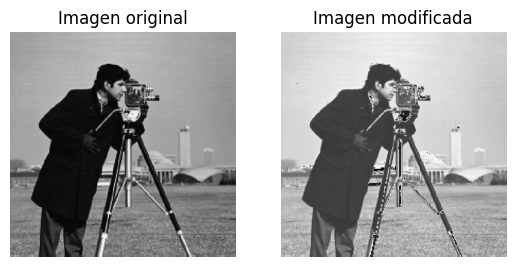

In [52]:
# Cargar la imagen
A = Image.open('camarografo.jpg')

# Informacion de la imagen
print(A.info)

# Tipo de formato
print(A.mode)  # Imprime el modo de color de la imagen, como 'RGB' o 'L'

# Guardar imagen
A.save('camarografoBMP.bmp')

# Mostrar una imagen
plt.subplot(1, 2, 1) 
plt.imshow(A, cmap='gray')  # Mostrar la imagen en escala de grises
plt.title('Imagen original')
plt.axis('off')  # Desactivar los ejes


# Operaciones básicas con imagenes: Suma
A_array = np.array(A) # Convertir la imagen a un array de numpy para la manipulacion de datos

B_array = A_array + 50 # Suma 50 a cada pixel

# Convertir de nuevo a una imagen de PIL para mostrar
B = Image.fromarray(B_array.astype('uint8'))

# Mostrar la imagen modificada
plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen modificada')
plt.axis('off')

plt.show()


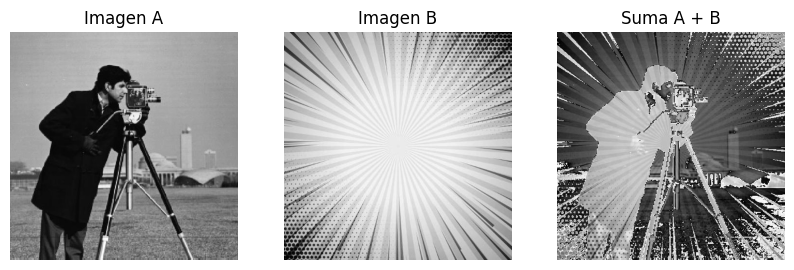

In [44]:
# Cargar las imagenes
A = Image.open('camarografo.jpg')
B = Image.open('fondo.jpg')

# Convertir las imágenes a arrays de numpy para la manipulacion
A_array = np.array(A)
B_array = np.array(B)

# Sumar imagenes
C_array = A_array + B_array
C = Image.fromarray(C_array)  # Conseguir la imagen

# Mostrar las imágenes
plt.figure(figsize=(10, 5))  # Ajustar tamanno de la figura
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen A')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen B')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(C, cmap='gray')
plt.title('Suma A + B')
plt.axis('off')

plt.show()

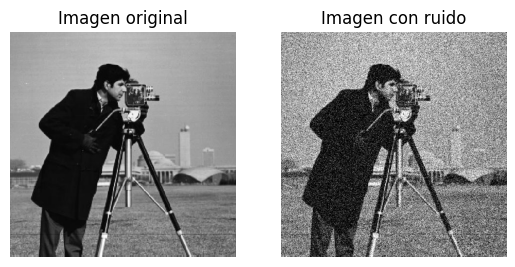

In [51]:
# Cargar la imagen
A = Image.open('camarografo.jpg')

# Convertir la imagen a un array de numpy y normalizar a rango [0, 1]
An = np.array(A) / 255.0

# Tamaño de la imagen
m, n = An.shape[:2]

# Generar ruido gaussiano con desviacion estandar 0.2
N = 0.2 * np.random.randn(m, n)

# Sumar ruido a la imagen normalizada
B = An + N


# Mostrar imagenes
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

# Convertir de vuelta a formato de 8 bits (0-255)
C = np.clip(B * 255, 0, 255).astype('uint8')
C_image = Image.fromarray(C)

# Mostrar la imagen con ruido
plt.subplot(1, 2, 2)
plt.imshow(C_image, cmap='gray')
plt.title('Imagen con ruido')
plt.axis('off')

plt.show()

# Guardar la imagen resultante
C_image.save('imagen_ruido.jpg')

In [47]:
# Cargar la imagen
A = Image.open('bote.jpg')

# Convertir la imagen a un array de numpy en formato de 8 bits
A_array = np.array(A)

# Extraer una submatriz 5x5 de la imagen
Ab = A_array[0:5, 0:5]

# Cambiar de formato a double sin normalizar
A1 = Ab.astype(float)

# Cambiar a formato double y normalizar
A2 = Ab.astype(float) / 255.0

# Desnormalizar y convertir a formato de 8 bits
A3 = (A2 * 255).astype(np.uint8)

# Imprimir los arrays para visualizar los cambios
print("Submatriz 5x5 en formato de 8 bits:\n", Ab)
print()
print("Submatriz convertida a float (double) sin normalizar:\n", A1)
print()
print("Submatriz normalizada:\n", A2)
print()
print("Submatriz desnormalizada y convertida a 8 bits:\n", A3)

Submatriz 5x5 en formato de 8 bits:
 [[126 126 125 123 122]
 [126 126 126 125 123]
 [125 127 128 127 126]
 [125 127 129 129 127]
 [125 127 129 129 127]]

Submatriz convertida a float (double) sin normalizar:
 [[126. 126. 125. 123. 122.]
 [126. 126. 126. 125. 123.]
 [125. 127. 128. 127. 126.]
 [125. 127. 129. 129. 127.]
 [125. 127. 129. 129. 127.]]

Submatriz normalizada:
 [[0.49411765 0.49411765 0.49019608 0.48235294 0.47843137]
 [0.49411765 0.49411765 0.49411765 0.49019608 0.48235294]
 [0.49019608 0.49803922 0.50196078 0.49803922 0.49411765]
 [0.49019608 0.49803922 0.50588235 0.50588235 0.49803922]
 [0.49019608 0.49803922 0.50588235 0.50588235 0.49803922]]

Submatriz desnormalizada y convertida a 8 bits:
 [[126 126 125 123 122]
 [126 126 126 125 123]
 [125 127 128 127 126]
 [125 127 129 129 127]
 [125 127 129 129 127]]


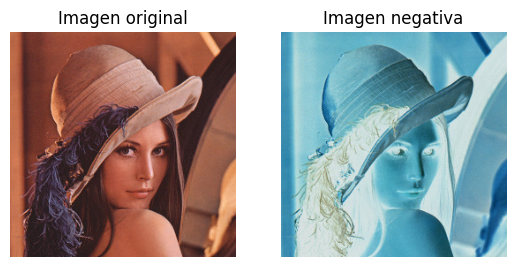

In [55]:
# Cargar la imagen
A = Image.open('lena.jpg')

# Convertir la imagen a un array de numpy y cambiar de formato a double
An = np.array(A).astype(float)

# Invertir los valores de los pixeles y convertir de vuelta a uint8
C = (255 - An).astype(np.uint8)


# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Imagen original')
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(C)
plt.title('Imagen negativa')
plt.axis('off')

plt.show()

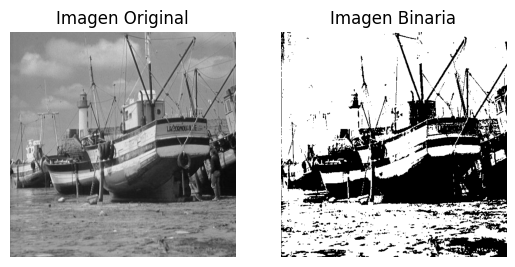

In [57]:
# Cargar la imagen
A = Image.open('bote.jpg')

# Convertir la imagen a un array de numpy
A_array = np.array(A)

# Tamanno de la imagen
m, n = A_array.shape

# Definir el umbral alpha
alpha = 127

# Crear una matriz de ceros del mismo tamaño que la imagen
C = np.zeros((m, n), dtype=np.uint8)

# Aplicar el umbral para crear la imagen binaria
for i in range(m):
    for j in range(n):
        if A_array[i, j] <= alpha:
            C[i, j] = 0
        else:
            C[i, j] = 255


# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(C, cmap='gray')
plt.title('Imagen Binaria')
plt.axis('off')

plt.show()

## Pregunta #2

Error Frobenius: 13.374649941342058
SSIM: 0.9013693332057531


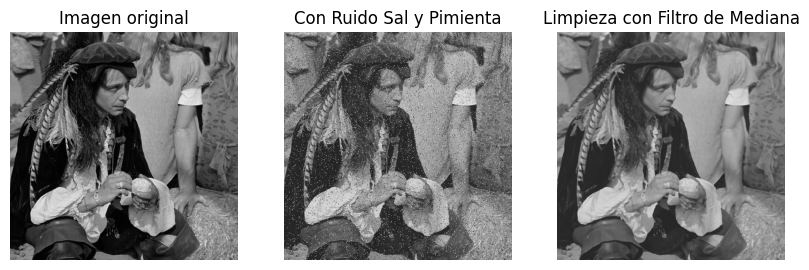

In [65]:
# Cargar la imagen
A = Image.open('imagen1.jpg')
A_array = np.array(A)

# Annadir ruido de sal y pimienta
Y = random_noise(A_array, mode='s&p', amount=0.05)
Y = (Y * 255).astype(np.uint8)  # Convertir de vuelta a uint8

# Aplicar filtro de mediana para eliminar ruido
Z = median_filter(Y, size=3)

# Calcular los errores
A_float = img_as_float(A_array)
Z_float = img_as_float(Z)
er1 = np.linalg.norm(A_float - Z_float, 'fro')  # Error norma Frobenius (similar a MSE)
er2 = ssim(A_float, Z_float, data_range=Z_float.max() - Z_float.min())  # SSIM

# Imprimir errores
print(f"Error Frobenius: {er1}")
print(f"SSIM: {er2}")

# Mostrar las imagenes
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Y, cmap='gray')
plt.title('Con Ruido Sal y Pimienta')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(Z, cmap='gray')
plt.title('Limpieza con Filtro de Mediana')
plt.axis('off')

plt.show()

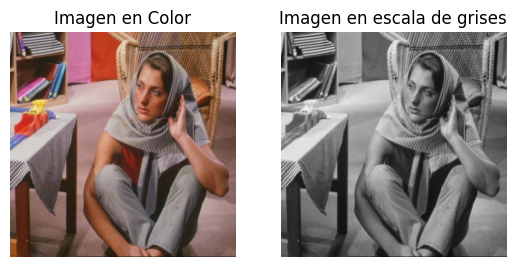

In [66]:
# Cargar la imagen
A = Image.open('imagen4.jpg')

# Convertir la imagen a escala de grises
B = A.convert('L')

# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.title('Imagen en Color')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')

plt.show()

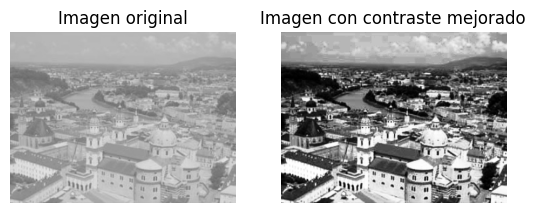

In [71]:
# Leer la imagen original
A = cv2.imread('imagen2.jpg')
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con Matplotlib

# Conversion de contraste
A_gray = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
B = cv2.equalizeHist(A_gray)


# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen con contraste mejorado')
plt.axis('off')

plt.show()

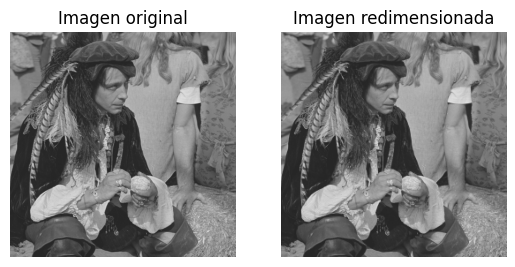

In [72]:
# Leer la imagen original
A = cv2.imread('imagen1.jpg')
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con Matplotlib

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(A_rgb)
plt.title('Imagen original')
plt.axis('off')

# Redimensionar la imagen al tamaño [256, 256]
B = cv2.resize(A_rgb, (256, 256))

# Mostrar la imagen redimensionada
plt.subplot(1, 2, 2)
plt.imshow(B)
plt.title('Imagen redimensionada')
plt.axis('off')

plt.show()

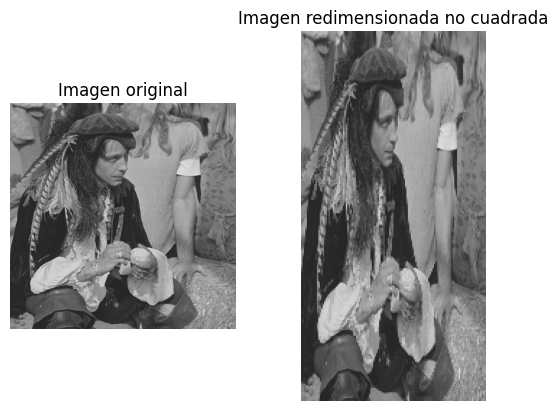

In [74]:
# Leer la imagen original
A = cv2.imread('imagen1.jpg')
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con Matplotlib

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(A_rgb)
plt.title('Imagen original')
plt.axis('off')

# Redimensionar la imagen al tamaño [256, 256]
B = cv2.resize(A_rgb, (128, 256))

# Mostrar la imagen redimensionada
plt.subplot(1, 2, 2)
plt.imshow(B)
plt.title('Imagen redimensionada no cuadrada')
plt.axis('off')

plt.show()

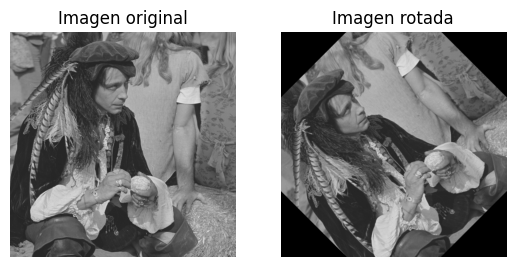

In [75]:
# Leer la imagen original
A = cv2.imread('imagen1.jpg')
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con Matplotlib

# Obtener las dimensiones de la imagen
(h, w) = A_rgb.shape[:2]

# Calcular el centro de la imagen
center = (w // 2, h // 2)

# Generar la matriz de transformación para rotar la imagen 45 grados
M = cv2.getRotationMatrix2D(center, 45, 1.0)

# Aplicar la rotación
B = cv2.warpAffine(A_rgb, M, (w, h))

# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(B)
plt.title('Imagen rotada')
plt.axis('off')

plt.show()

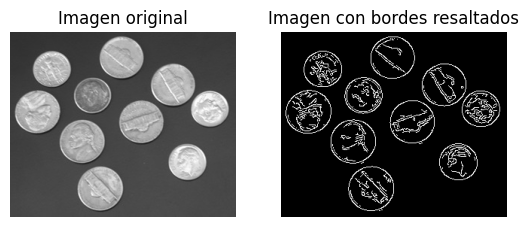

In [76]:
# Leer la imagen original
A = cv2.imread('imagen3.jpg')
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con Matplotlib

# Convertir la imagen a escala de grises
A_gray = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

# Aplicar la detección de bordes
B = cv2.Canny(A_gray, 100, 200)

# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen con bordes resaltados')
plt.axis('off')

plt.show()

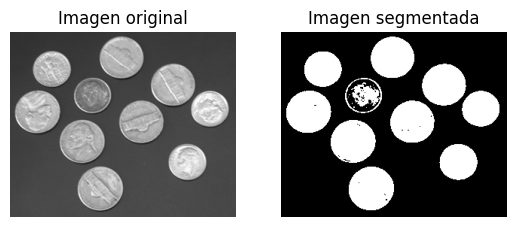

In [77]:
# Leer la imagen original
A = cv2.imread('imagen3.jpg')
A_rgb = cv2.cvtColor(A, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB para mostrar correctamente con Matplotlib

# Convertir la imagen a escala de grises
A_gray = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)

# Calcular el umbral automáticamente usando el método de Otsu
_, B = cv2.threshold(A_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Mostrar las imagenes
plt.subplot(1, 2, 1)
plt.imshow(A_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(B, cmap='gray')
plt.title('Imagen segmentada')
plt.axis('off')

plt.show()

## Pregunta #3

In [97]:
% Este comando es necesario para los scripts de Octave en este entorno
graphics_toolkit("gnuplot")

In [ ]:
pkg load image

% Carga la imagen original
A = imread('barbara.jpg');
A = imresize(A, [128 128]);

% Dimensiones originales
[m, n, r] = size(A);

% Calcula las dimensiones necesarias para contener la imagen rotada
dim = floor(sqrt(m^2 + n^2)) + 1;

% Nueva imagen más grande
B = uint8(zeros(dim, dim, r));

% Centrado de la imagen original en la nueva imagen
inicio_x = floor((dim - m) / 2) + 1;
inicio_y = floor((dim - n) / 2) + 1;
B(inicio_x:(inicio_x + m - 1), inicio_y:(inicio_y + n - 1), :) = A;

% Rotacion
angulo = -45;
a0 = cosd(angulo); a1 = sind(angulo);
b0 = -sind(angulo); b1 = cosd(angulo);
xc = floor(dim / 2); yc = floor(dim / 2); % Nuevo centro

C = uint8(zeros(dim, dim, r));
for x = 1:dim
    for y = 1:dim
        x_aux = round(a0 * (x - xc) + a1 * (y - yc) + xc);
        y_aux = round(b0 * (x - xc) + b1 * (y - yc) + yc);
        if (x_aux >= 1 && x_aux <= dim && y_aux >= 1 && y_aux <= dim)
            C(x_aux, y_aux, :) = B(x, y, :);
        end
    end
end


% Muestras las imagenes
figure;
set(gcf, 'Position', [0, 0, 1200, 1200]);
subplot(1,2,1)
imshow(A)
title('Imagen original')

subplot(1,2,2)
imshow(C)
title('Imagen rotada')

## Pregunta #4

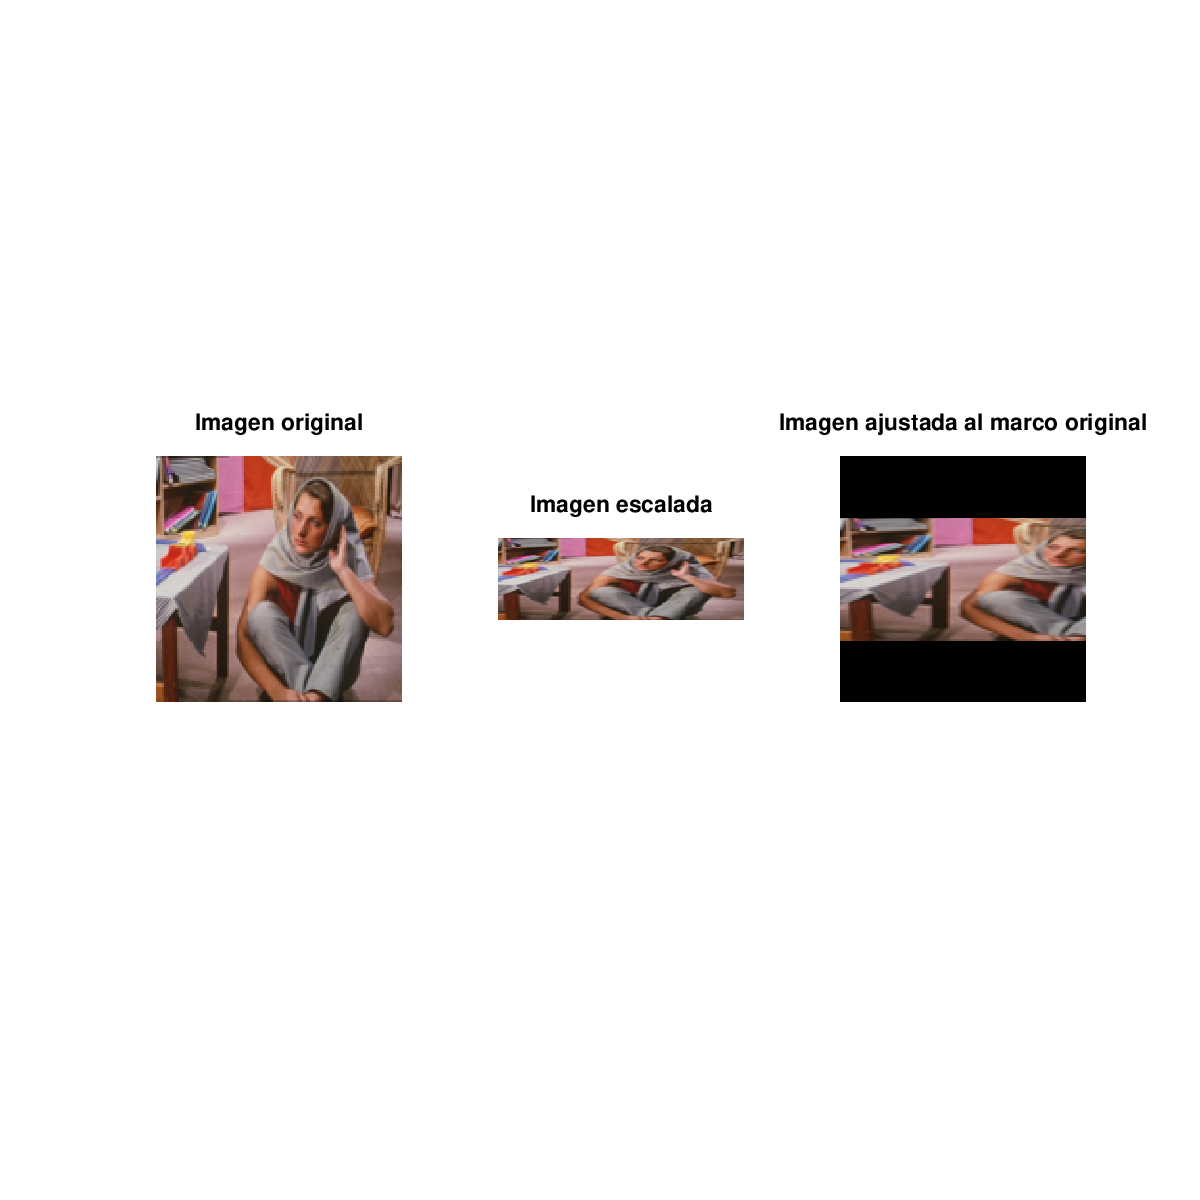

In [102]:
pkg load image

% Carga la imagen original
A = imread('barbara.jpg');
A = imresize(A, [128 128]); 

% Escalamiento
s_x = 0.5; % Escalar filas
s_y = 1.5; % Escalar columnas

% Aplicar el escalamiento
B = imresize(A, [floor(size(A, 1) * s_x) floor(size(A, 2) * s_y)]);

% Crear una nueva imagen del tamanno original con fondo negro o un color de fondo
C = zeros(size(A, 1), size(A, 2), 3, 'uint8');

% Calcular inicio para centrar la imagen escalada en el marco original
x = max(round((size(C, 1) - size(B, 1)) / 2) + 1, 1);
y = max(round((size(C, 2) - size(B, 2)) / 2) + 1, 1);

% Calcular fin, asegurando no exceder dimensiones de C
x_p = min(inicio_x + size(B, 1) - 1, size(C, 1));
y_p = min(inicio_y + size(B, 2) - 1, size(C, 2));

% Insertar la imagen escalada en la nueva imagen
C(x:x_p, y:y_p, :) = B(1:(x_p-x+1), 1:(y_p-y+1), :);


% Muestra las imagenes
figure;
set(gcf, 'Position', [0, 0, 1200, 1200]);
subplot(1,3,1);
imshow(A);
title('Imagen original');

subplot(1,3,2);
imshow(B);
title('Imagen escalada');

subplot(1,3,3);
imshow(C);
title('Imagen ajustada al marco original');

## Pregunta #5

## Pregunta #6